In [2]:
import pandas as pd
df=pd.read_csv("C:\IDS\TRAINING\Applied Data Science Techniques with Python\Course_Data\Advertise.csv")

In [8]:
paper=df[df['ad']=='paper']
radio=df[df['ad']=='radio']
people=df[df['ad']=='people']
display=df[df['ad']=='display']

In [17]:
import scipy.stats as stats
stat, p = stats.f_oneway(paper['sales'],display['sales'])

In [18]:
# interpret 
alpha=0.05
if p>alpha:
    print('İki kanal farklı değildir, H0 kabul')
else:
    print('Satış kanallarının performansı farklıdır, H0 red')

Satış kanallarının performansı farklıdır, H0 red


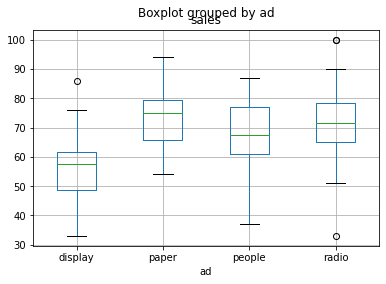

In [19]:
import matplotlib.pyplot as plot
boxplot=df.boxplot(column=['sales'],by='ad')

In [22]:
# Import FX Data 
df = pd.read_csv('C:/IDS/TRAINING/Applied Data Science Techniques with Python/Day5Data/d5data/usdtry.csv') 

In [27]:
df['Date2']=pd.to_datetime(df['Date'], format='%Y%m%d')

In [31]:
df['Lag1Price']=df.Price.shift(-1)

In [33]:
df=df.dropna()

In [34]:
df.corr

Date   Price      Date2  Lag1Price
0     20191010  5.8365 2019-10-10     5.8712
1     20191009  5.8712 2019-10-09     5.8311
2     20191008  5.8311 2019-10-08     5.8328
3     20191007  5.8328 2019-10-07     5.6962
4     20191004  5.6962 2019-10-04     5.6947
...        ...     ...        ...        ...
1038  20151019  2.9054 2015-10-19     2.8917
1039  20151016  2.8917 2015-10-16     2.8803
1040  20151015  2.8803 2015-10-15     2.9137
1041  20151014  2.9137 2015-10-14     2.9586
1042  20151013  2.9586 2015-10-13     2.9264

[1043 rows x 4 columns]

In [35]:
df['Price'].corr(df['Lag1Price'])

0.9985865183021175

In [39]:
df[['Price','Lag1Price']].corr(method='pearson')

Price  Lag1Price
Price      1.000000   0.998587
Lag1Price  0.998587   1.000000

In [40]:
df['Return']=(((df.Price)/(df.Price.shift(-1)))-1)*100

<ipython-input-40-7a6c973bf878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return']=(((df.Price)/(df.Price.shift(-1)))-1)*100


In [41]:
df.dropna()
df['Price'].corr(df['Return'])
df[['Price','Return']].corr(method='pearson')

Price    Return
Price   1.000000  0.035655
Return  0.035655  1.000000

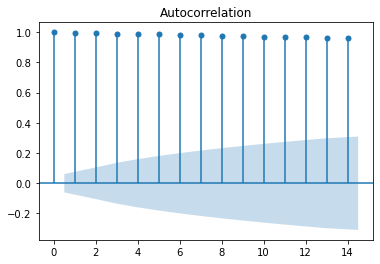

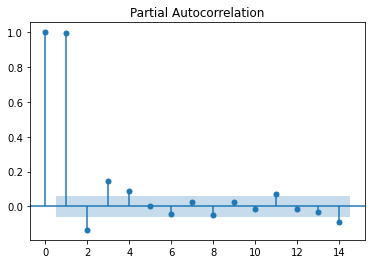

In [83]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.graphics.tsa.plot_acf(df['Price'], lags=14)
fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=14)
plt.show()

In [42]:
Fitness=pd.read_csv("C:/IDS/TRAINING/Applied Data Science Techniques with Python/Course_Data/fitness.csv")
Fitness

Name Gender  Runtime  Age  Weight  Oxygen_Consumption  Run_Pulse  \
0      Donna      F     8.17   42   68.15               59.57        166   
1     Gracie      F     8.63   38   81.87               60.06        170   
2     Luanne      F     8.65   43   85.84               54.30        156   
3       Mimi      F     8.92   50   70.87               54.63        146   
4      Chris      M     8.95   49   81.42               49.16        180   
5      Allen      M     9.22   38   89.02               49.87        178   
6      Nancy      F     9.40   49   76.32               48.67        186   
7      Patty      F     9.63   52   76.32               45.44        164   
8    Suzanne      F     9.93   57   59.08               50.55        148   
9     Teresa      F    10.00   51   77.91               46.67        162   
10       Bob      M    10.07   40   75.07               45.31        185   
11  Harriett      F    10.08   49   73.37               50.39        168   
12      Jane      F    10.13   44   73.03               50.54        168   
13    Harold      M    10.25   48   91.63               46.77        162   
14     Sammy      M    10.33   54   83.12               51.85        166   
15     Buffy      F    10.47   52   73.71               45.79        186   
16     Trent      M    10.50   52   82.78               47.47        170   
17    Jackie      F    10.60   47   79.15               47.27        162   
18     Ralph      M    10.85   43   81.19               49.09        162   
19      Jack      M    10.95   51   69.63               40.84        168   
20     Annie      F    11.08   51   67.25               45.12        172   
21      Kate      F    11.12   45   66.45               44.75        176   
22      Carl      M    11.17   54   79.38               46.08        156   
23       Don      M    11.37   44   89.47               44.61        178   
24     Effie      F    11.50   48   61.24               47.92        170   
25    George      M    11.63   47   77.45               44.81        176   
26      Iris      F    11.95   40   75.98               45.68        176   
27      Mark      M    12.63   57   73.37               39.41        174   
28     Steve      M    12.88   54   91.63               39.20        168   
29    Vaughn      M    13.08   44   81.42               39.44        174   
30   William      M    14.03   45   87.66               37.39        186   

    Rest_Pulse  Maximum_Pulse  Performance  
0           40            172           14  
1           48            186           13  
2           45            168           13  
3           48            155           11  
4           44            185           11  
5           55            180           12  
6           56            188           10  
7           48            166           10  
8           49            155            9  
9           48            168            9  
10          62            185            9  
11          67            168            9  
12          45            168            9  
13          48            164            9  
14          50            170            8  
15          59            188            8  
16          53            172            8  
17          47            164            8  
18          64            170            7  
19          57            172            7  
20          48            172            7  
21          51            176            7  
22          62            165            7  
23          62            182            6  
24          52            176            6  
25          58            176            6  
26          70            180            5  
27          58            176            4  
28          44            172            4  
29          63            176            2  
30          56            192            0

In [43]:
Fitness[['Runtime','Age','Weight','Oxygen_Consumption','Run_Pulse','Rest_Pulse','Maximum_Pulse']].corr(method='pearson') 

Runtime       Age    Weight  Oxygen_Consumption  \
Runtime             1.000000  0.195228  0.143508           -0.862185   
Age                 0.195228  1.000000 -0.240505           -0.311618   
Weight              0.143508 -0.240505  1.000000           -0.162891   
Oxygen_Consumption -0.862185 -0.311618 -0.162891            1.000000   
Run_Pulse           0.313648 -0.316065  0.181516           -0.398080   
Rest_Pulse          0.450383 -0.150873  0.043974           -0.399348   
Maximum_Pulse       0.226103 -0.414903  0.249381           -0.236767   

                    Run_Pulse  Rest_Pulse  Maximum_Pulse  
Runtime              0.313648    0.450383       0.226103  
Age                 -0.316065   -0.150873      -0.414903  
Weight               0.181516    0.043974       0.249381  
Oxygen_Consumption  -0.398080   -0.399348      -0.236767  
Run_Pulse            1.000000    0.352461       0.929754  
Rest_Pulse           0.352461    1.000000       0.305124  
Maximum_Pulse        0.929754    0.305124       1.000000

In [53]:
X=Fitness[['Age','Weight','Rest_Pulse']]
Y=Fitness['Runtime']

In [54]:
Y

0      8.17
1      8.63
2      8.65
3      8.92
4      8.95
5      9.22
6      9.40
7      9.63
8      9.93
9     10.00
10    10.07
11    10.08
12    10.13
13    10.25
14    10.33
15    10.47
16    10.50
17    10.60
18    10.85
19    10.95
20    11.08
21    11.12
22    11.17
23    11.37
24    11.50
25    11.63
26    11.95
27    12.63
28    12.88
29    13.08
30    14.03
Name: Runtime, dtype: float64

In [55]:
import statsmodels.api as sm

In [56]:
X=sm.add_constant(X)

In [57]:
X

const  Age  Weight  Rest_Pulse
0     1.0   42   68.15          40
1     1.0   38   81.87          48
2     1.0   43   85.84          45
3     1.0   50   70.87          48
4     1.0   49   81.42          44
5     1.0   38   89.02          55
6     1.0   49   76.32          56
7     1.0   52   76.32          48
8     1.0   57   59.08          49
9     1.0   51   77.91          48
10    1.0   40   75.07          62
11    1.0   49   73.37          67
12    1.0   44   73.03          45
13    1.0   48   91.63          48
14    1.0   54   83.12          50
15    1.0   52   73.71          59
16    1.0   52   82.78          53
17    1.0   47   79.15          47
18    1.0   43   81.19          64
19    1.0   51   69.63          57
20    1.0   51   67.25          48
21    1.0   45   66.45          51
22    1.0   54   79.38          62
23    1.0   44   89.47          62
24    1.0   48   61.24          52
25    1.0   47   77.45          58
26    1.0   40   75.98          70
27    1.0   57   73.37          58
28    1.0   54   91.63          44
29    1.0   44   81.42          63
30    1.0   45   87.66          56

In [58]:
model=sm.OLS(Y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     4.057
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0168
Time:                        12:00:27   Log-Likelihood:                -47.862
No. Observations:                  31   AIC:                             103.7
Df Residuals:                      27   BIC:                             109.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7155      3.796     -0.189      0.852      -8.504       7.073
Age            0.0835      0.044      1.904      0.068      -0.006       0.174
Weight         0.0330      0.027      1.204      0.239      -0.023       0.089
Rest_Pulse     0.0891      0.029      3.028      0.005       0.029       0.150
==============================================================================
Omnibus:                        4.774   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.822
Skew:                           0.859   Prob(JB):                        0.148
Kurtosis:                       3.080   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Runtime = 8.1321 + Age*0.0515

In [59]:
CS=pd.read_csv("C:\IDS\TRAINING\Applied Data Science Techniques with Python\Course_Data\cs_accepts.csv")

In [75]:
X=CS[['CHILDREN','PERS_H','AGE','TMADD','TMJOB1','RESID']]
C=CS['GB']

In [65]:
C

0       0
1       1
2       1
3       1
4       0
       ..
2995    1
2996    0
2997    1
2998    0
2999    1
Name: GB, Length: 3000, dtype: int64

In [76]:
X=sm.add_constant(X)

In [79]:
X
X = pd.get_dummies(X, columns=['RESID'])

In [80]:
X

const  CHILDREN  PERS_H  AGE  TMADD  TMJOB1  RESID_Lease  RESID_Owner
0       1.0         0       2   46   15.0    33.0            1            0
1       1.0         4       6   34  144.0    54.0            0            1
2       1.0         3       5   31  108.0   120.0            1            0
3       1.0         0       1   39  192.0     6.0            1            0
4       1.0         3       5   32   48.0   108.0            1            0
...     ...       ...     ...  ...    ...     ...          ...          ...
2995    1.0         0       1   26  192.0     6.0            1            0
2996    1.0         0       1   34   12.0    30.0            1            0
2997    1.0         0       1   32    9.0    24.0            1            0
2998    1.0         0       1   31    3.0    12.0            1            0
2999    1.0         0       2   27   36.0    36.0            1            0

[3000 rows x 8 columns]

In [81]:
model=sm.OLS(C,X)

In [82]:
res=model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GB   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     46.22
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.55e-62
Time:                        14:31:05   Log-Likelihood:                -2023.4
No. Observations:                3000   AIC:                             4063.
Df Residuals:                    2992   BIC:                             4111.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0677      0.040     26.788      0.000       0.990       1.146
CHILDREN        0.1529      0.025      6.029      0.000       0.103       0.203
PERS_H         -0.1470      0.020     -7.197      0.000      -0.187      -0.107
AGE            -0.0099      0.001    -10.890      0.000      -0.012      -0.008
TMADD        3.165e-05    5.1e-05      0.620      0.535   -6.84e-05       0.000
TMJOB1         -0.0002   7.55e-05     -3.057      0.002      -0.000   -8.28e-05
RESID_Lease     0.0056      0.023      0.245      0.806      -0.039       0.050
RESID_Owner     0.0208      0.048      0.432      0.666      -0.073       0.115
==============================================================================
Omnibus:                    15201.960   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.925
Skew:                          -0.016   Prob(JB):                     7.55e-71
Kurtosis:                       1.393   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""